## 🔍 What Problem Does SMOTE Solve?
In imbalanced datasets, machine learning models tend to bias toward the majority class, ignoring the minority class, which is often the more important class (like fraud detection, disease diagnosis, etc.).

## ✅ What SMOTE Does:
Instead of simply duplicating minority class examples (which can lead to overfitting), SMOTE generates synthetic samples of the minority class by interpolating between existing minority class instances.

In [37]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

### I use this beacause imblearn library does not imported nor installed

In [38]:
from sklearn.datasets import make_classification

x,y = make_classification(
    n_samples = 1000,
    n_features = 2,
    n_redundant = 0,
    n_clusters_per_class = 1,
    weights = [0.90],
    random_state = 12
)

In [39]:
print(x)    ## x has two features

[[-0.76289759 -0.70680807]
 [-1.07543571 -1.0511621 ]
 [-0.61011459 -0.90980157]
 ...
 [-1.32643852 -1.815178  ]
 [-0.83348573 -0.5146474 ]
 [-0.30287558 -0.57597532]]


In [40]:
print(y)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

In [41]:
import pandas as pd 

df1 = pd.DataFrame(
    data = x, 
    columns=['f1', 'f2']
)

df2 = pd.DataFrame(
    data = y,
    columns=['target']
)

## concatinate both dataFrames
final_df = pd.concat(
    [df1, df2],
    axis=1     ## columnwise
)

In [42]:
print(df1.shape)
print(df2.shape)
print(final_df.shape)

(1000, 2)
(1000, 1)
(1000, 3)


In [43]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

Text(0, 0.5, 'feature 2')

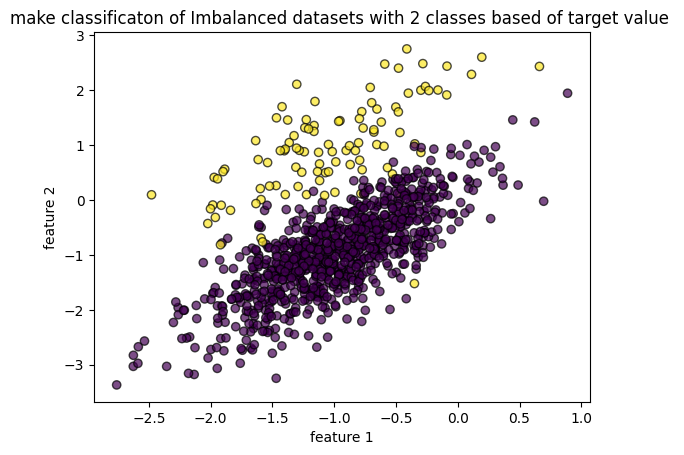

In [44]:
###  visualization

import matplotlib.pyplot as plt
plt.scatter(
    final_df['f1'],
    final_df['f2'],
    c=final_df['target'],
    edgecolors='black',
    alpha=0.7
)

plt.title('make classificaton of Imbalanced datasets with 2 classes based of target value ')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

## 

## Handling this Imbalanced daatset via SMOTE

In [45]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
## transform the dataset

oversample = SMOTE()   ### create a SMOTE object
x,y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])     ### this will balanced the dataset

In [48]:
x.shape

(1800, 2)

In [49]:
y.shape

(1800,)

In [50]:
len(y==0)   ### or len(y[y==0])

1800

In [51]:
len(y==1)    ### or len(y[y==1])

1800

In [52]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [53]:
y[y==1]

3       1
19      1
26      1
34      1
39      1
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 900, dtype: int64

In [54]:
### not again make dataframe to concatinat

df1 = pd.DataFrame(x, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

oversampled_df = pd.concat(
    [df1, df2],
    axis=1
)

In [55]:
oversampled_df.shape

(1800, 3)

In [56]:
oversampled_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


Text(0, 0.5, 'f2')

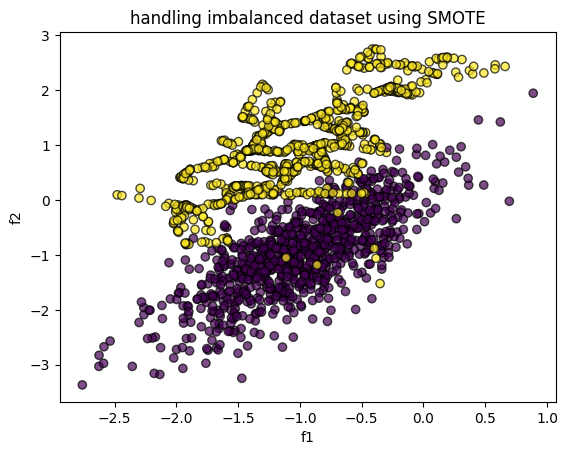

In [57]:
### visualization using scatter plot

plt.scatter(
    oversampled_df['f1'],
    oversampled_df['f2'],
    c = oversampled_df['target'],
    edgecolors='black',
    alpha = 0.7
)
plt.title('handling imbalanced dataset using SMOTE')
plt.xlabel('f1')
plt.ylabel('f2')